### Document Splitting 

We will do Document splitting after Document Loading and before storing the document into Vector Database. We will split the document into multiple chunks 

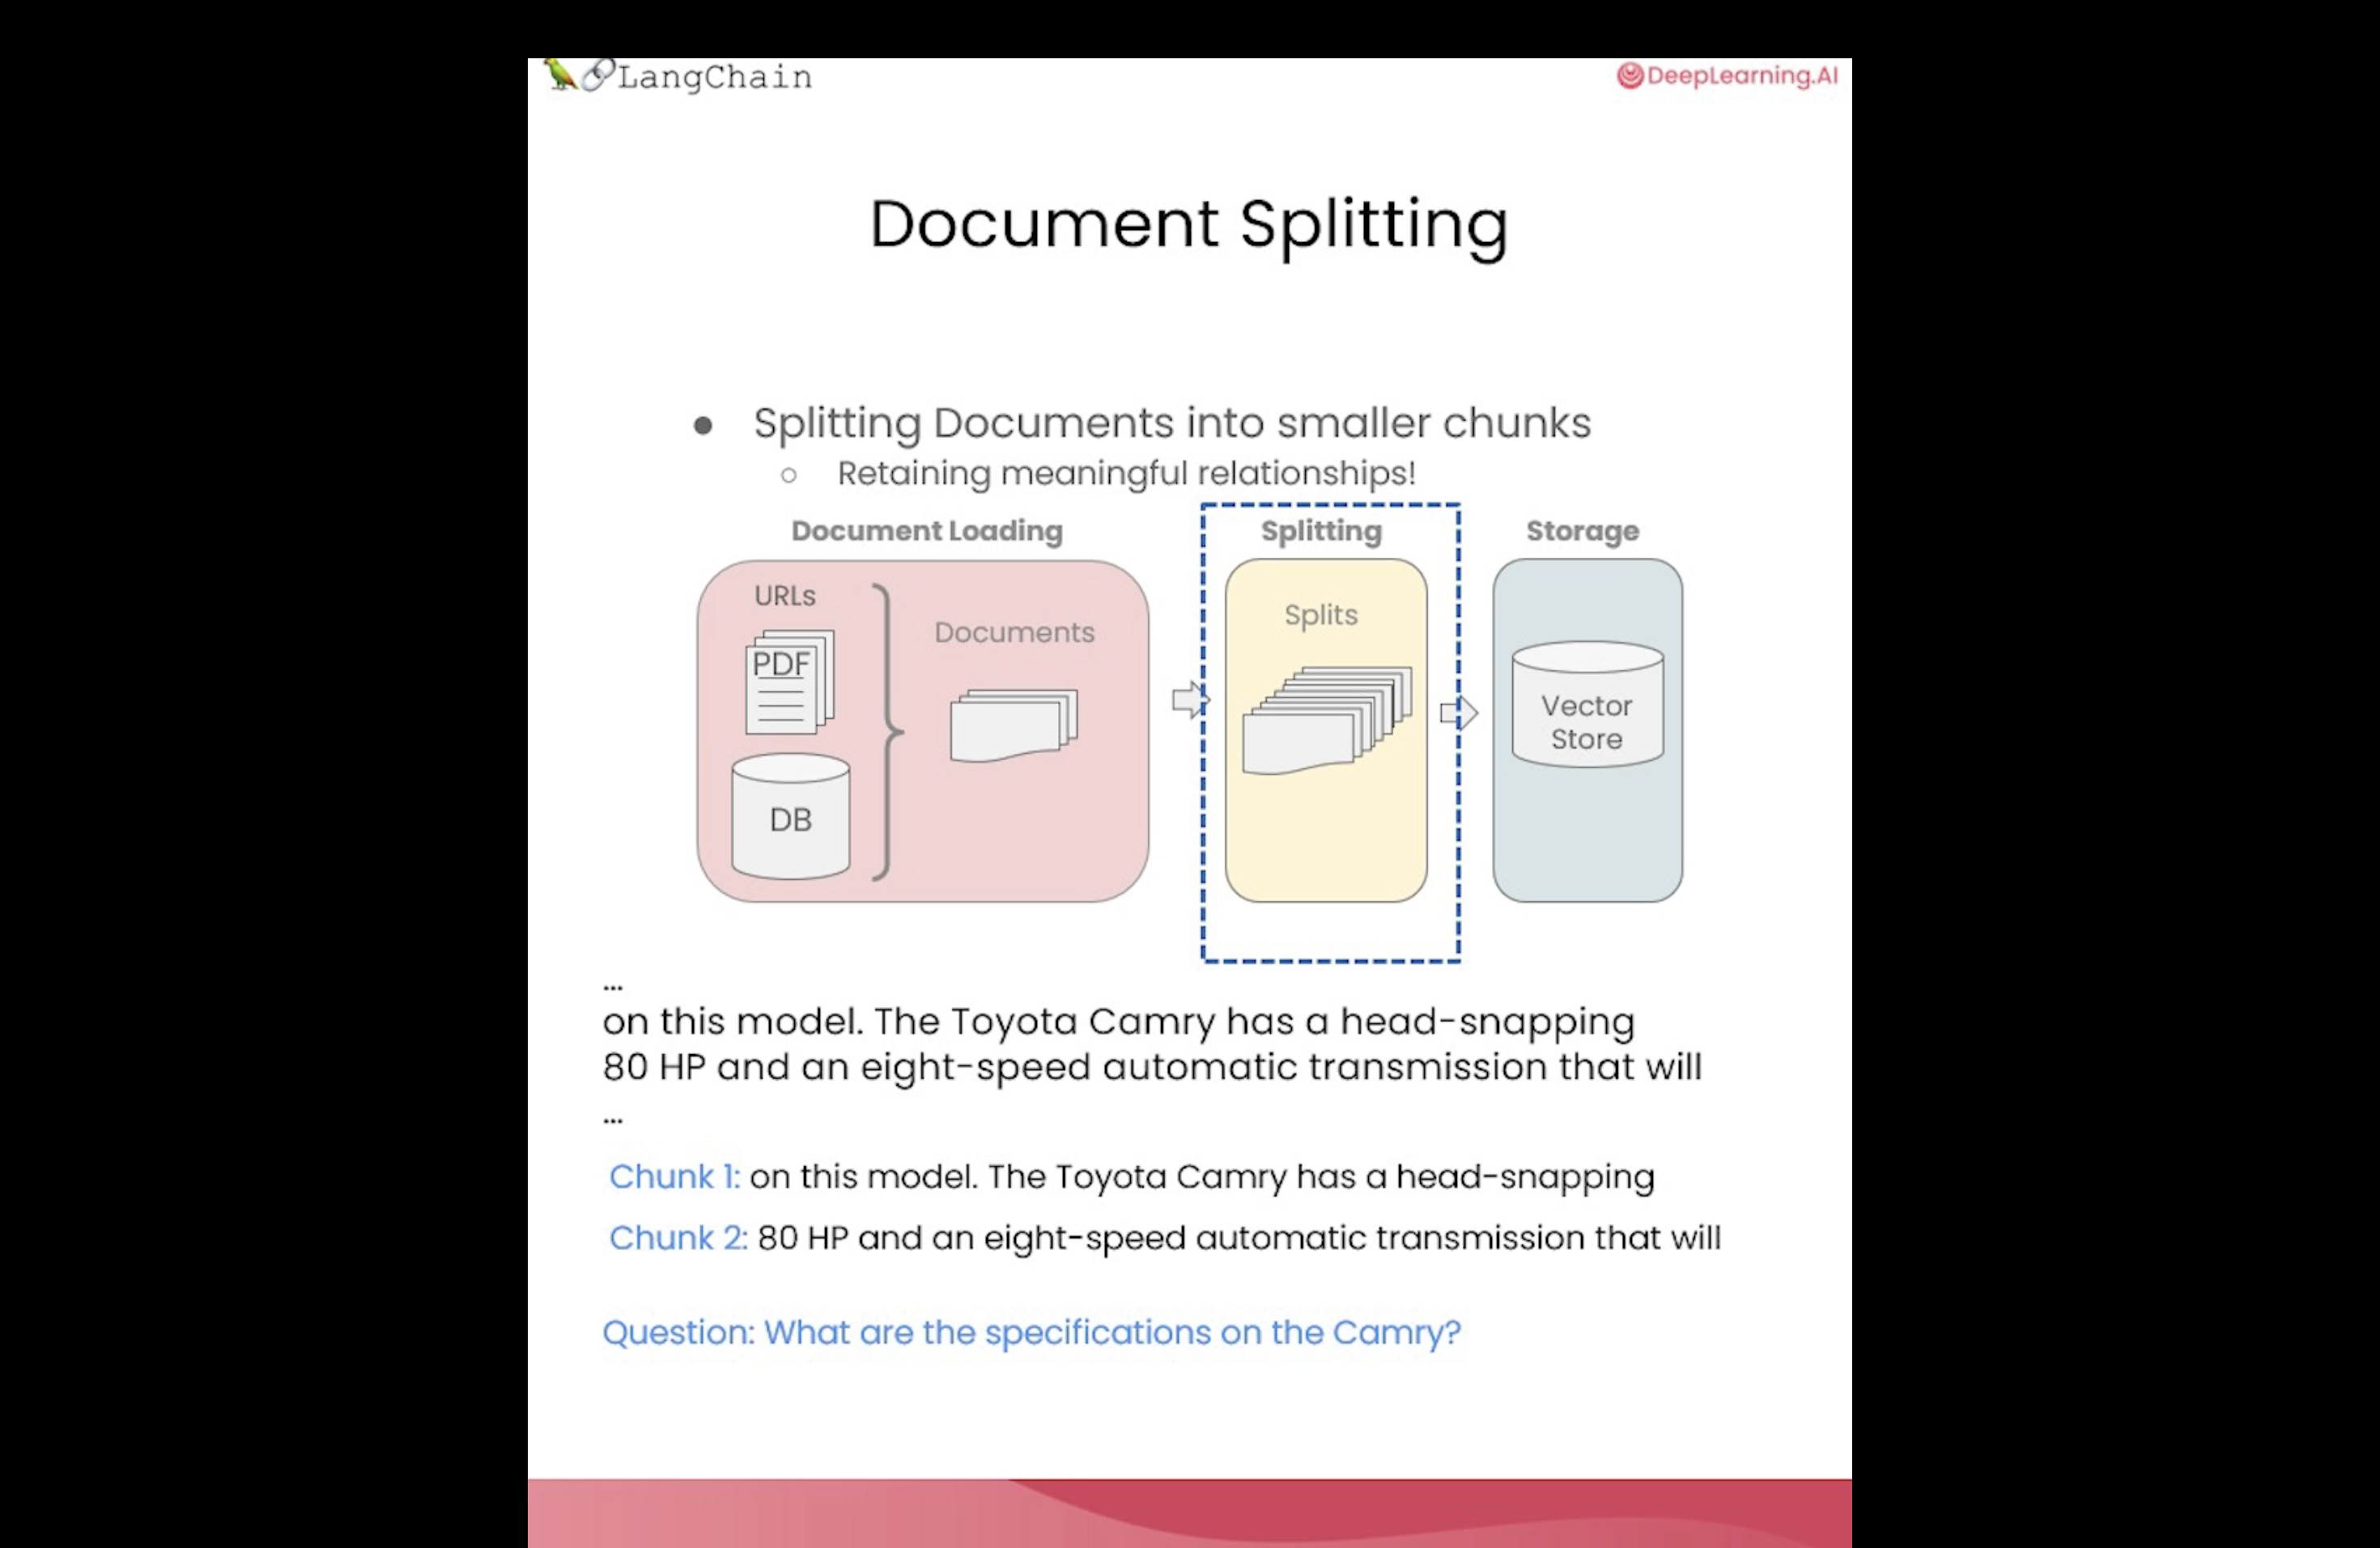

So if we dont split the document correctly . We wont be able to get answer for most of questions asked . So if you take above example. You will not be able to answer this question. 


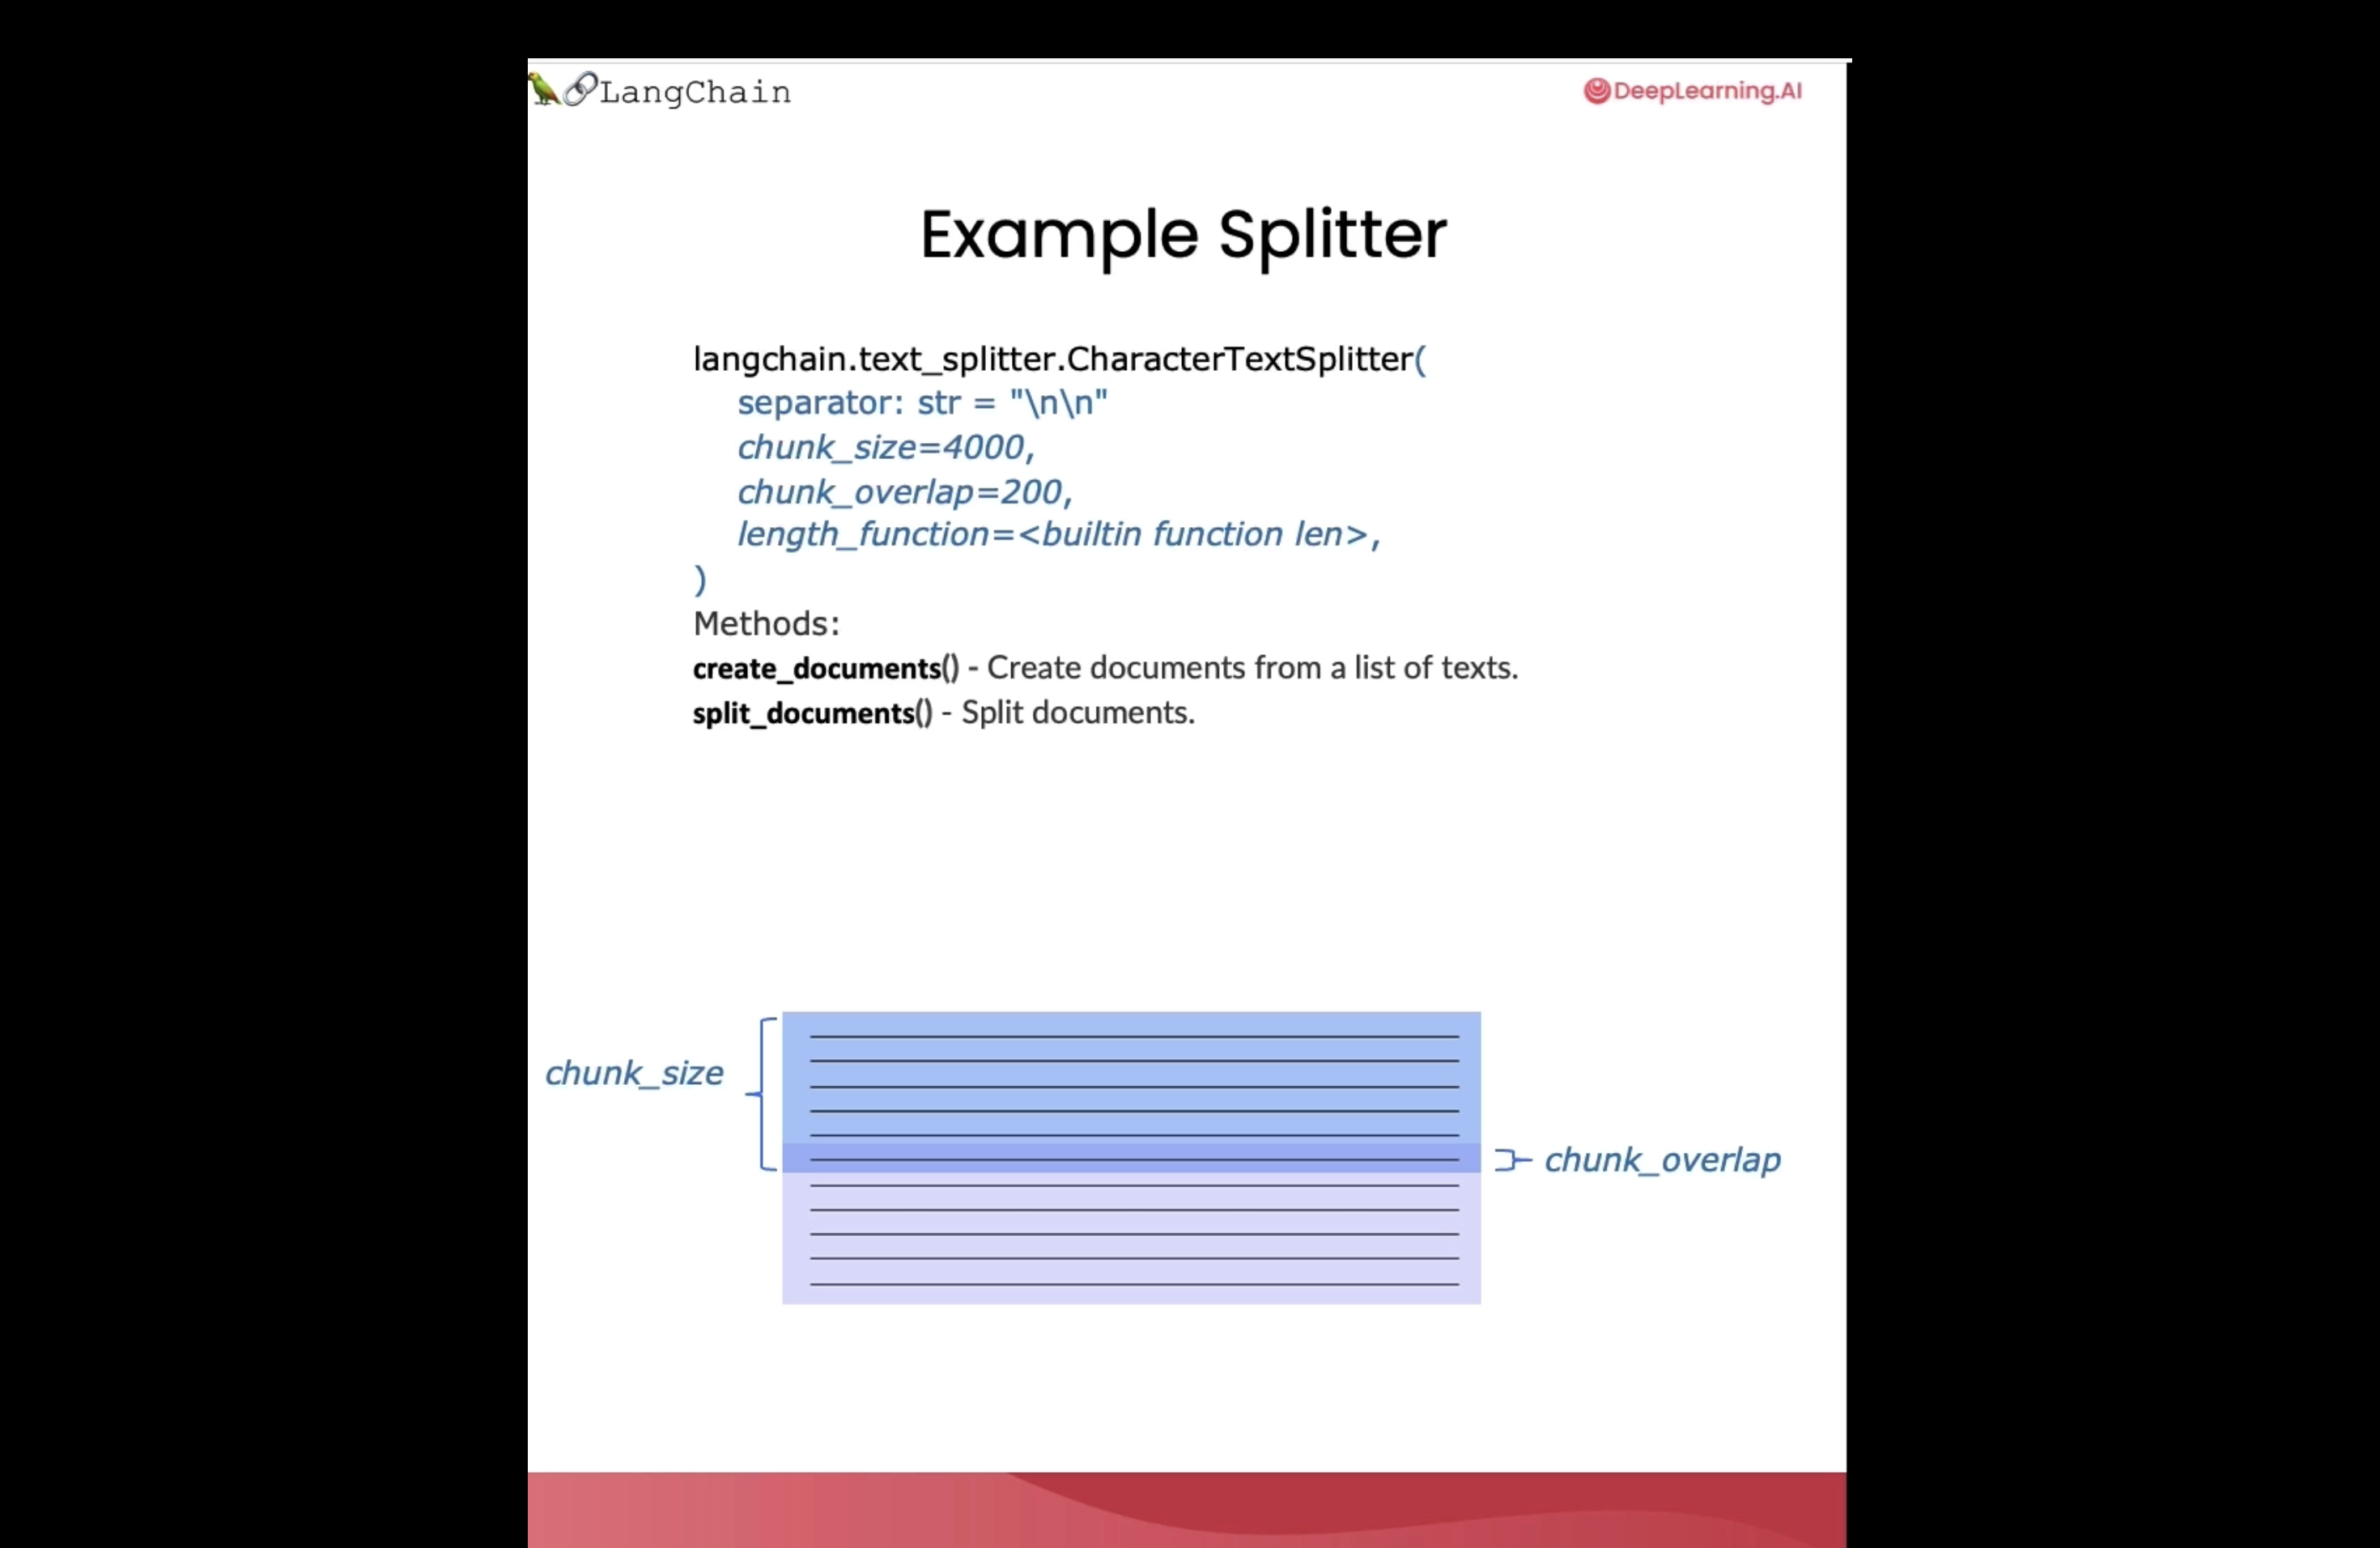

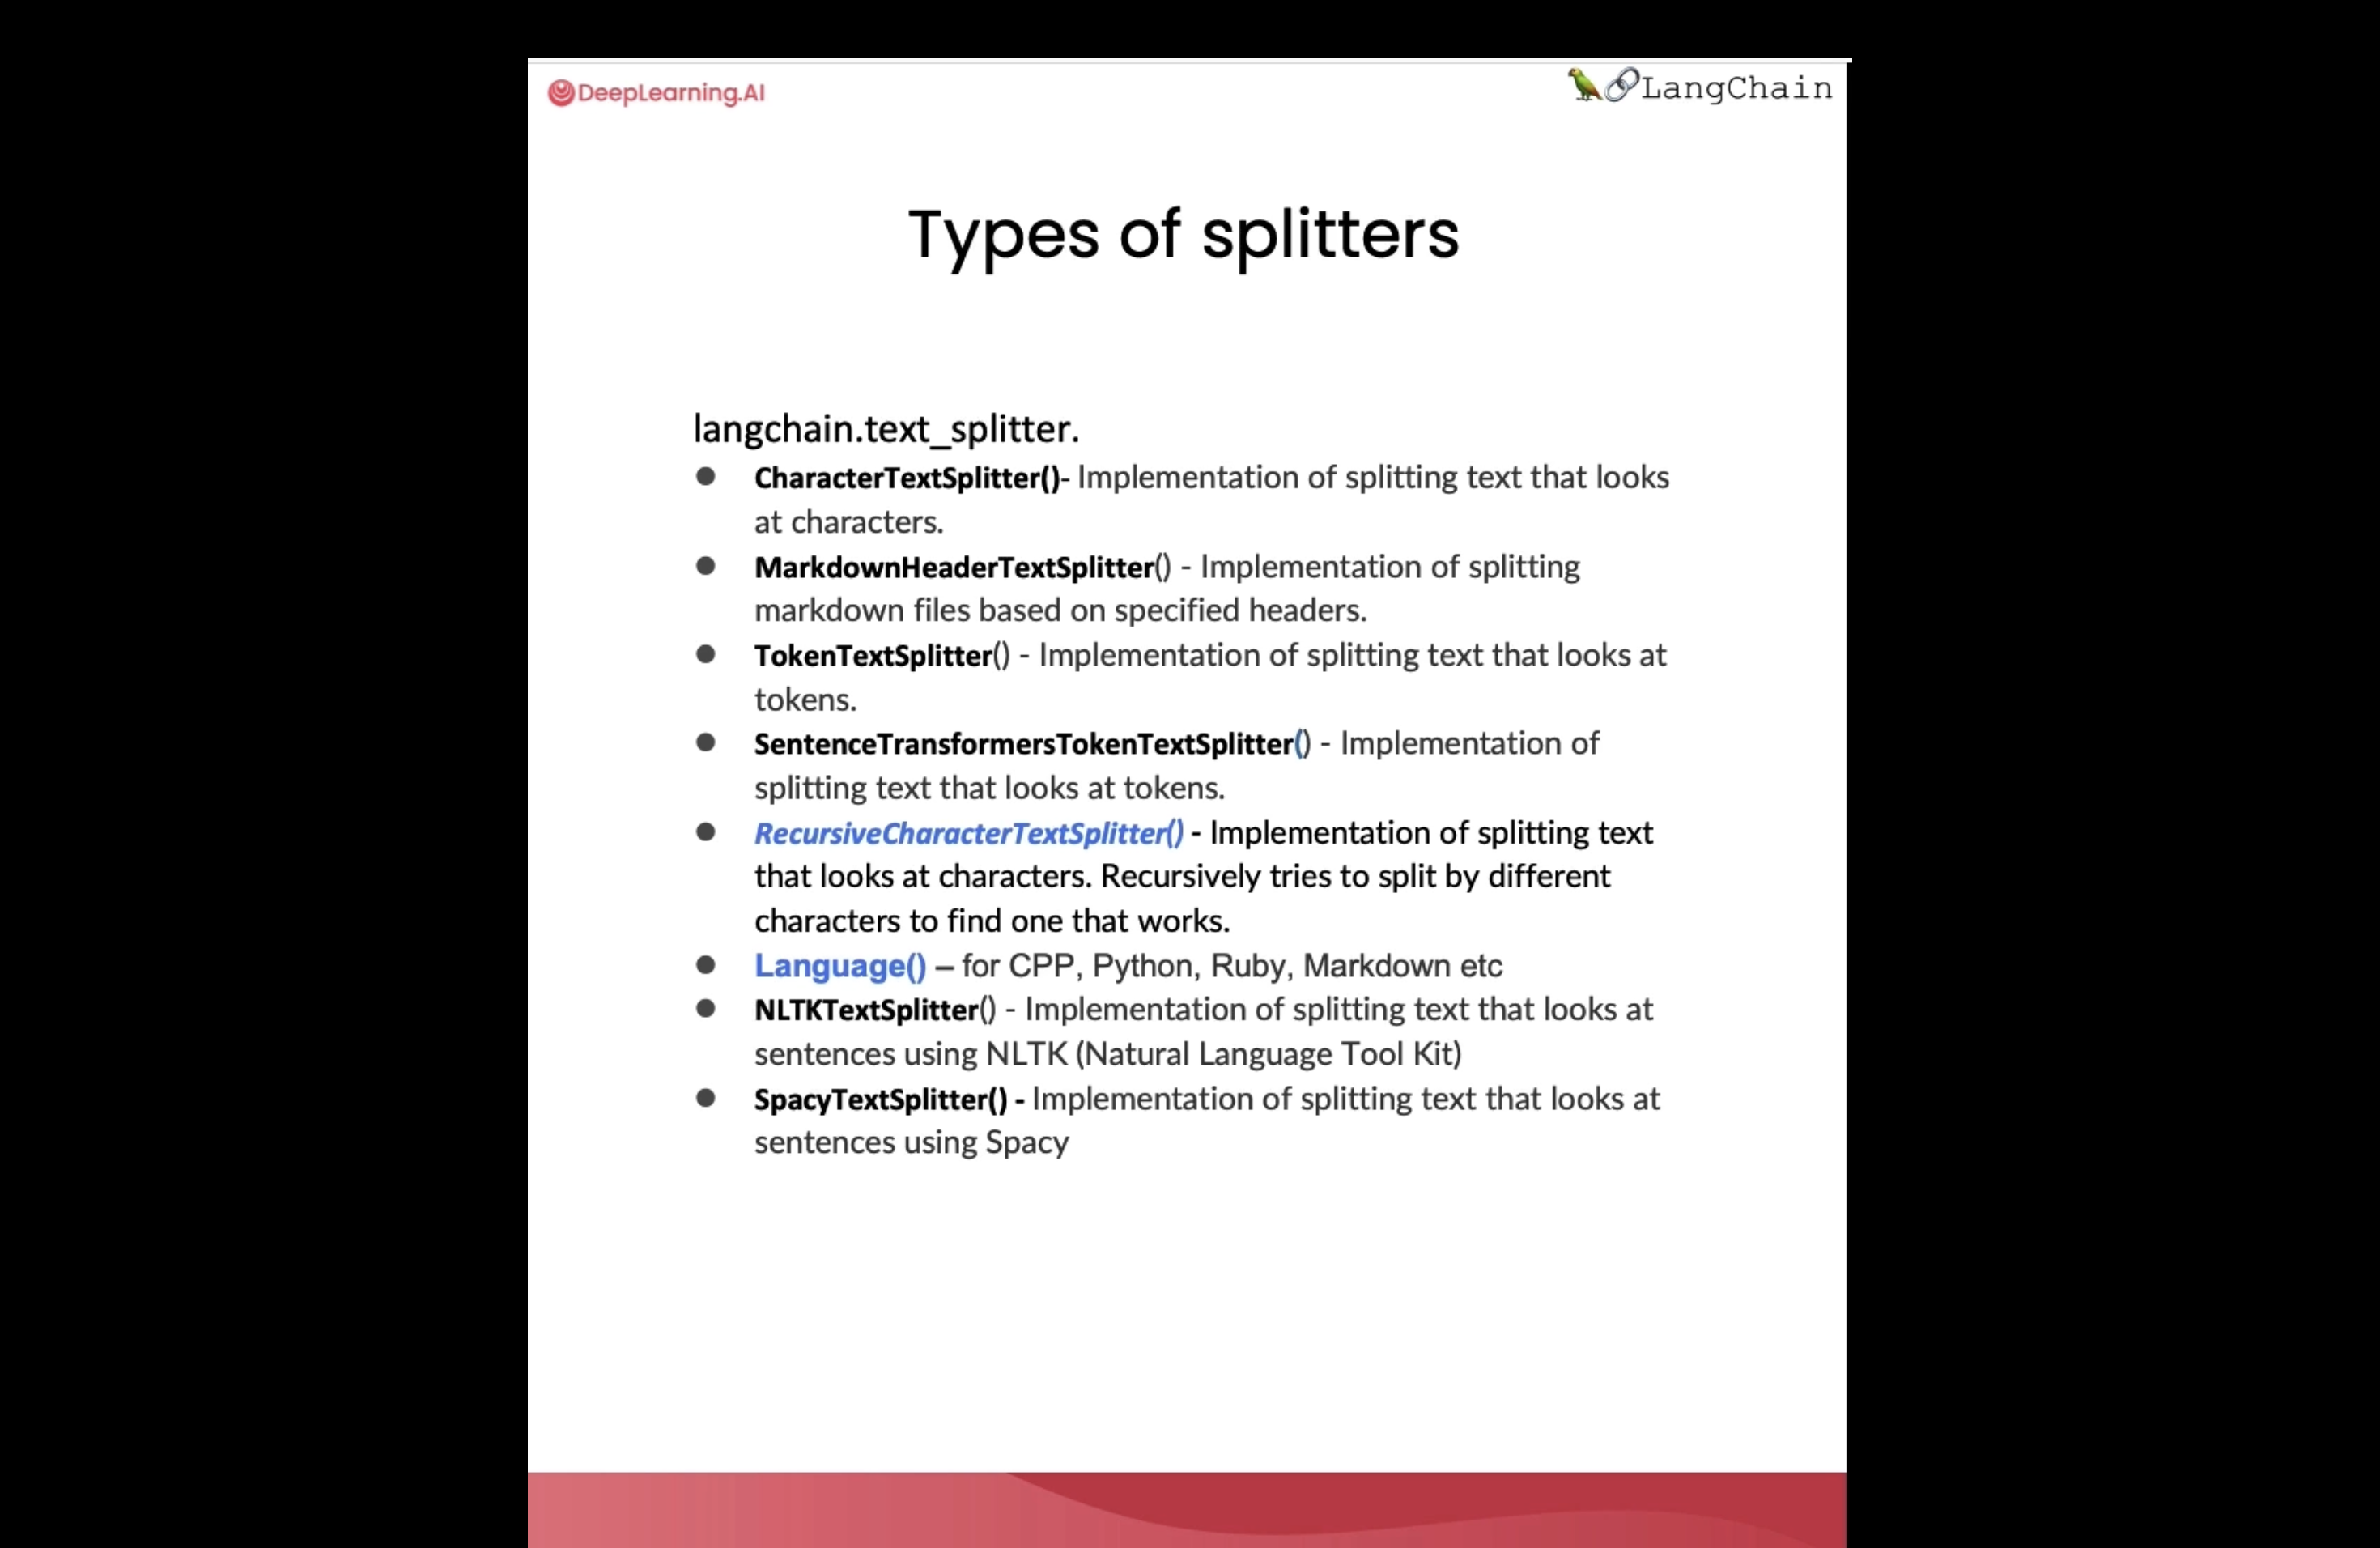

In [1]:
import os
import openai
import sys
sys.path.append('../..')

from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv()) # read local .env file

openai.api_key  = os.environ['OPENAI_API_KEY']

from langchain.text_splitter import RecursiveCharacterTextSplitter, CharacterTextSplitter

chunk_size =26
chunk_overlap = 4

r_splitter = RecursiveCharacterTextSplitter(
    chunk_size=chunk_size,
    chunk_overlap=chunk_overlap
)
c_splitter = CharacterTextSplitter(
    chunk_size=chunk_size,
    chunk_overlap=chunk_overlap
)

/Users/mfho-27019739/Desktop/AIML/Github/LLM/.venv/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
text1 = 'abcdefghijklmnopqrstuvwxyz'
r_splitter.split_text(text1)

['abcdefghijklmnopqrstuvwxyz']

In [3]:
text2 = 'abcdefghijklmnopqrstuvwxyzabcdefg'
r_splitter.split_text(text2)

['abcdefghijklmnopqrstuvwxyz', 'wxyzabcdefg']

Ok, this splits the string but we have an overlap specified as 5, but it looks like 3? (try an even number)

In [4]:
## In RecursiveCharacterText Split we are considering spaces as well
text3 = "a b c d e f g h i j k l m n o p q r s t u v w x y z"
r_splitter.split_text(text3)

['a b c d e f g h i j k l m', 'l m n o p q r s t u v w x', 'w x y z']

In [5]:
## In CharacterTextSplit we are not consifering spaces
c_splitter.split_text(text3)

['a b c d e f g h i j k l m n o p q r s t u v w x y z']

In [6]:
c_splitter = CharacterTextSplitter(
    chunk_size=chunk_size,
    chunk_overlap=chunk_overlap,
    separator = ' '
)
c_splitter.split_text(text3)
## If we specifiy seperator

['a b c d e f g h i j k l m', 'l m n o p q r s t u v w x', 'w x y z']

### Recursive splitting details

`RecursiveCharacterTextSplitter` is recommended for generic text. 

In [7]:
some_text = """When writing documents, writers will use document structure to group content. \
This can convey to the reader, which idea's are related. For example, closely related ideas \
are in sentances. Similar ideas are in paragraphs. Paragraphs form a document. \n\n  \
Paragraphs are often delimited with a carriage return or two carriage returns. \
Carriage returns are the "backslash n" you see embedded in this string. \
Sentences have a period at the end, but also, have a space.\
and words are separated by space."""
len(some_text)

496

In [8]:
c_splitter = CharacterTextSplitter(
    chunk_size=450,
    chunk_overlap=0,
    separator = ' '
)
r_splitter = RecursiveCharacterTextSplitter(
    chunk_size=450,
    chunk_overlap=0, 
    separators=["\n\n", "\n", " ", ""] ## Step by step splitting is done
)

In [9]:
c_splitter.split_text(some_text)
## We get weird seperation as output 

['When writing documents, writers will use document structure to group content. This can convey to the reader, which idea\'s are related. For example, closely related ideas are in sentances. Similar ideas are in paragraphs. Paragraphs form a document. \n\n Paragraphs are often delimited with a carriage return or two carriage returns. Carriage returns are the "backslash n" you see embedded in this string. Sentences have a period at the end, but also,',
 'have a space.and words are separated by space.']

In [10]:
## This will perfectly split into 2 paragraphs
r_splitter.split_text(some_text)

["When writing documents, writers will use document structure to group content. This can convey to the reader, which idea's are related. For example, closely related ideas are in sentances. Similar ideas are in paragraphs. Paragraphs form a document.",
 'Paragraphs are often delimited with a carriage return or two carriage returns. Carriage returns are the "backslash n" you see embedded in this string. Sentences have a period at the end, but also, have a space.and words are separated by space.']

Let's reduce the chunk size a bit and add a period to our separators:

In [14]:
r_splitter = RecursiveCharacterTextSplitter(
    chunk_size=150,
    chunk_overlap=0,
    separators=["\n\n", "\n", "\. ", " ", ""]
)
r_splitter.split_text(some_text)

["When writing documents, writers will use document structure to group content. This can convey to the reader, which idea's are related. For example,",
 'closely related ideas are in sentances. Similar ideas are in paragraphs. Paragraphs form a document.',
 'Paragraphs are often delimited with a carriage return or two carriage returns. Carriage returns are the "backslash n" you see embedded in this',
 'string. Sentences have a period at the end, but also, have a space.and words are separated by space.']

In [15]:
r_splitter = RecursiveCharacterTextSplitter(
    chunk_size=150,
    chunk_overlap=0,
    separators=["\n\n", "\n", "(?<=\. )", " ", ""]
)
r_splitter.split_text(some_text)

["When writing documents, writers will use document structure to group content. This can convey to the reader, which idea's are related. For example,",
 'closely related ideas are in sentances. Similar ideas are in paragraphs. Paragraphs form a document.',
 'Paragraphs are often delimited with a carriage return or two carriage returns. Carriage returns are the "backslash n" you see embedded in this',
 'string. Sentences have a period at the end, but also, have a space.and words are separated by space.']

Document Splitting of PDF 

In [16]:
from langchain.document_loaders import PyPDFLoader
loader = PyPDFLoader("docs/cs229_lectures/MachineLearning-Lecture01.pdf")
pages = loader.load()

from langchain.text_splitter import CharacterTextSplitter
text_splitter = CharacterTextSplitter(
    separator="\n",
    chunk_size=1000,
    chunk_overlap=150,
    length_function=len
)

docs = text_splitter.split_documents(pages)
len(docs)

77

In [17]:
docs

[Document(page_content="MachineLearning-Lecture01  \nInstructor (Andrew Ng):  Okay. Good morning. Welcome to CS229, the machine \nlearning class. So what I wanna do today is ju st spend a little time going over the logistics \nof the class, and then we'll start to  talk a bit about machine learning.  \nBy way of introduction, my name's  Andrew Ng and I'll be instru ctor for this class. And so \nI personally work in machine learning, and I' ve worked on it for about 15 years now, and \nI actually think that machine learning is th e most exciting field of all the computer \nsciences. So I'm actually always excited about  teaching this class. Sometimes I actually \nthink that machine learning is not only the most exciting thin g in computer science, but \nthe most exciting thing in all of human e ndeavor, so maybe a little bias there.  \nI also want to introduce the TAs, who are all graduate students doing research in or \nrelated to the machine learni ng and all aspects of machin e learn

In [18]:
len(pages)

22

Document Splitting - Notion DB

In [19]:
from langchain.document_loaders import NotionDirectoryLoader
loader = NotionDirectoryLoader("docs/Notion_DB")
notion_db = loader.load()

docs = text_splitter.split_documents(notion_db)
len(notion_db)

1

In [20]:
len(docs)

8

In [22]:
docs

[Document(page_content="# Blendle's Employee Handbook\nThis is a living document with everything we've learned working with people while running a startup. And, of course, we continue to learn. Therefore it's a document that will continue to change. \n**Everything related to working at Blendle and the people of Blendle, made public.**\nThese are the lessons from three years of working with the people of Blendle. It contains everything from [how our leaders lead](https://www.notion.so/ecfb7e647136468a9a0a32f1771a8f52?pvs=21) to [how we increase salaries](https://www.notion.so/Salary-Review-e11b6161c6d34f5c9568bb3e83ed96b6?pvs=21), from [how we hire](https://www.notion.so/Hiring-451bbcfe8d9b49438c0633326bb7af0a?pvs=21) and [fire](https://www.notion.so/Firing-5567687a2000496b8412e53cd58eed9d?pvs=21) to [how we think people should give each other feedback](https://www.notion.so/Our-Feedback-Process-eb64f1de796b4350aeab3bc068e3801f?pvs=21) — and much more.", metadata={'source': "docs/Notion

#### Token splitting

We can also split on token count explicity, if we want.

This can be useful because LLMs often have context windows designated in tokens.

Tokens are often ~4 characters.

In [23]:
from langchain.text_splitter import TokenTextSplitter
text_splitter = TokenTextSplitter(chunk_size=1, chunk_overlap=0)
text1 = "foo bar bazzyfoo"
text_splitter.split_text(text1)

['foo', ' bar', ' b', 'az', 'zy', 'foo']

In [24]:
text_splitter = TokenTextSplitter(chunk_size=10, chunk_overlap=0)
docs = text_splitter.split_documents(pages)
docs

[Document(page_content='MachineLearning-Lecture01  \n', metadata={'source': 'docs/cs229_lectures/MachineLearning-Lecture01.pdf', 'page': 0}),
 Document(page_content='Instructor (Andrew Ng):  Okay. Good', metadata={'source': 'docs/cs229_lectures/MachineLearning-Lecture01.pdf', 'page': 0}),
 Document(page_content=' morning. Welcome to CS229, the machine ', metadata={'source': 'docs/cs229_lectures/MachineLearning-Lecture01.pdf', 'page': 0}),
 Document(page_content='\nlearning class. So what I wanna do today', metadata={'source': 'docs/cs229_lectures/MachineLearning-Lecture01.pdf', 'page': 0}),
 Document(page_content=' is ju st spend a little time going over the', metadata={'source': 'docs/cs229_lectures/MachineLearning-Lecture01.pdf', 'page': 0}),
 Document(page_content=' logistics \nof the class, and then we', metadata={'source': 'docs/cs229_lectures/MachineLearning-Lecture01.pdf', 'page': 0}),
 Document(page_content="'ll start to  talk a bit about machine learning", metadata={'source': 

In [25]:
docs[0]

Document(page_content='MachineLearning-Lecture01  \n', metadata={'source': 'docs/cs229_lectures/MachineLearning-Lecture01.pdf', 'page': 0})

In [26]:
pages[0].metadata

{'source': 'docs/cs229_lectures/MachineLearning-Lecture01.pdf', 'page': 0}

In [27]:
len(docs)

1557

##### Context aware splitting

Adds  Metadata into each Chunk

Chunking aims to keep text with common context together.

A text splitting often uses sentences or other delimiters to keep related text together but many documents (such as Markdown) have structure (headers) that can be explicitly used in splitting.

We can use `MarkdownHeaderTextSplitter` to preserve header metadata in our chunks, as show below.

This will split the data in Markdown with Headers/SubHeaders and then it will add this headers/subheaders as content to metadata field

In [28]:
from langchain.document_loaders import NotionDirectoryLoader
from langchain.text_splitter import MarkdownHeaderTextSplitter

markdown_document = """# Title\n\n \
## Chapter 1\n\n \
Hi this is Jim\n\n Hi this is Joe\n\n \
### Section \n\n \
Hi this is Lance \n\n 
## Chapter 2\n\n \
Hi this is Molly"""

headers_to_split_on = [
    ("#", "Header 1"),
    ("##", "Header 2"),
    ("###", "Header 3"),
]

markdown_splitter = MarkdownHeaderTextSplitter(
    headers_to_split_on=headers_to_split_on
)
md_header_splits = markdown_splitter.split_text(markdown_document)
md_header_splits

[Document(page_content='Hi this is Jim  \nHi this is Joe', metadata={'Header 1': 'Title', 'Header 2': 'Chapter 1'}),
 Document(page_content='Hi this is Lance', metadata={'Header 1': 'Title', 'Header 2': 'Chapter 1', 'Header 3': 'Section'}),
 Document(page_content='Hi this is Molly', metadata={'Header 1': 'Title', 'Header 2': 'Chapter 2'})]

In [29]:
md_header_splits[0]

Document(page_content='Hi this is Jim  \nHi this is Joe', metadata={'Header 1': 'Title', 'Header 2': 'Chapter 1'})

NOTION DB

In [30]:
loader = NotionDirectoryLoader("docs/Notion_DB")
docs = loader.load()
txt = ' '.join([d.page_content for d in docs])

headers_to_split_on = [
    ("#", "Header 1"),
    ("##", "Header 2"),
]
markdown_splitter = MarkdownHeaderTextSplitter(
    headers_to_split_on=headers_to_split_on
)

md_header_splits = markdown_splitter.split_text(txt)
md_header_splits[0]

Document(page_content="This is a living document with everything we've learned working with people while running a startup. And, of course, we continue to learn. Therefore it's a document that will continue to change.  \n**Everything related to working at Blendle and the people of Blendle, made public.**  \nThese are the lessons from three years of working with the people of Blendle. It contains everything from [how our leaders lead](https://www.notion.so/ecfb7e647136468a9a0a32f1771a8f52?pvs=21) to [how we increase salaries](https://www.notion.so/Salary-Review-e11b6161c6d34f5c9568bb3e83ed96b6?pvs=21), from [how we hire](https://www.notion.so/Hiring-451bbcfe8d9b49438c0633326bb7af0a?pvs=21) and [fire](https://www.notion.so/Firing-5567687a2000496b8412e53cd58eed9d?pvs=21) to [how we think people should give each other feedback](https://www.notion.so/Our-Feedback-Process-eb64f1de796b4350aeab3bc068e3801f?pvs=21) — and much more.  \nWe've made this document public because we want to learn fro

In [31]:
md_header_splits

[Document(page_content="This is a living document with everything we've learned working with people while running a startup. And, of course, we continue to learn. Therefore it's a document that will continue to change.  \n**Everything related to working at Blendle and the people of Blendle, made public.**  \nThese are the lessons from three years of working with the people of Blendle. It contains everything from [how our leaders lead](https://www.notion.so/ecfb7e647136468a9a0a32f1771a8f52?pvs=21) to [how we increase salaries](https://www.notion.so/Salary-Review-e11b6161c6d34f5c9568bb3e83ed96b6?pvs=21), from [how we hire](https://www.notion.so/Hiring-451bbcfe8d9b49438c0633326bb7af0a?pvs=21) and [fire](https://www.notion.so/Firing-5567687a2000496b8412e53cd58eed9d?pvs=21) to [how we think people should give each other feedback](https://www.notion.so/Our-Feedback-Process-eb64f1de796b4350aeab3bc068e3801f?pvs=21) — and much more.  \nWe've made this document public because we want to learn fr